In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
file_path = '/content/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(file_path)

In [3]:
# Dataset Overview
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1        

** Data Cleaning**

In [4]:
# Dropping unhelpful columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [5]:
# Converting date columns to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [6]:
# Adding a new column for days until appointment
df['DaysUntilAppointment'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [7]:
# Ensuring Gender is categorical
df['Gender'] = df['Gender'].astype('category')

In [8]:
# Converting columns to boolean where applicable
for col in ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']:
    df[col] = df[col].astype(bool)

In [9]:
# Converting 'No-show' to boolean (True for "Yes", False for "No")
df['No-show'] = df['No-show'].map({'Yes': True, 'No': False})

In [10]:
# Cleaning 'Handcap' to only contain 0 and 1
df['Handcap'] = df['Handcap'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
# Handling inconsistent 'Age' values
df = df[df['Age'] >= 0]  # Remove negative ages

In [12]:
# Dataset Summary After Cleaning
print("\nDataset Info After Cleaning:")
print(df.info())


Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   Gender                110526 non-null  category           
 1   ScheduledDay          110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay        110526 non-null  datetime64[ns, UTC]
 3   Age                   110526 non-null  int64              
 4   Neighbourhood         110526 non-null  object             
 5   Scholarship           110526 non-null  bool               
 6   Hipertension          110526 non-null  bool               
 7   Diabetes              110526 non-null  bool               
 8   Alcoholism            110526 non-null  bool               
 9   Handcap               110526 non-null  int64              
 10  SMS_received          110526 non-null  bool               
 11  No-show               11052

**# Data Visualization**

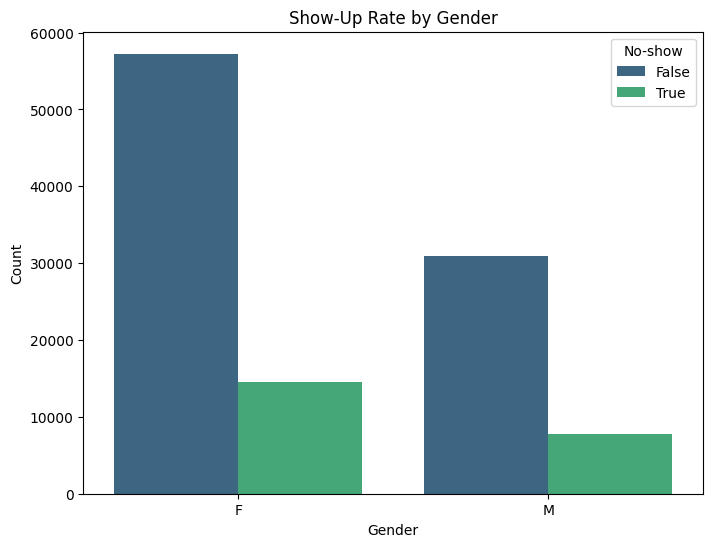

In [14]:
## Q1: Gender Distribution and Show-up Rate
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='No-show', data=df, palette='viridis')
plt.title('Show-Up Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

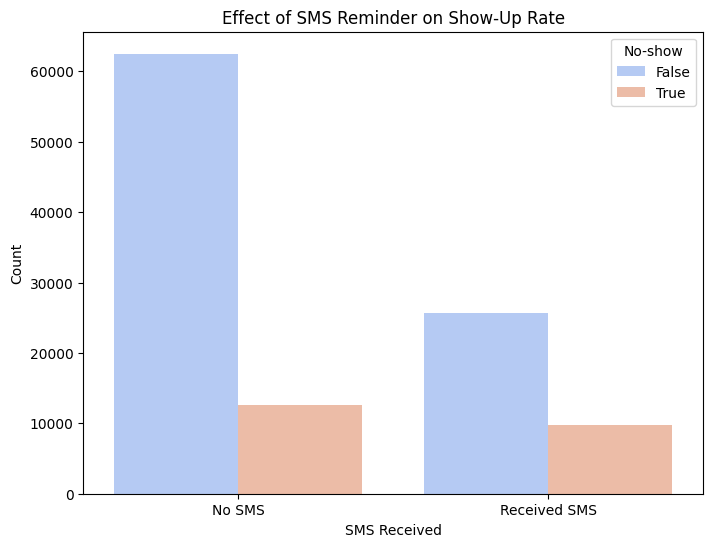

In [15]:
## Q2: SMS Reminder Effect
plt.figure(figsize=(8, 6))
sns.countplot(x='SMS_received', hue='No-show', data=df, palette='coolwarm')
plt.title('Effect of SMS Reminder on Show-Up Rate')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.xticks([0, 1], ['No SMS', 'Received SMS'])
plt.show()

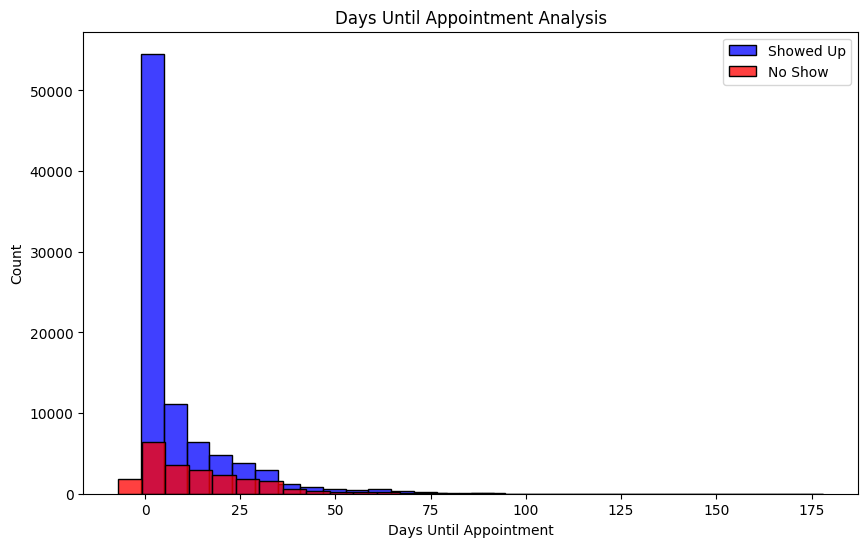

In [16]:
## Days Until Appointment Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df[df['No-show'] == False]['DaysUntilAppointment'], bins=30, color='blue', label='Showed Up')
sns.histplot(df[df['No-show'] == True]['DaysUntilAppointment'], bins=30, color='red', label='No Show')
plt.title('Days Until Appointment Analysis')
plt.xlabel('Days Until Appointment')
plt.ylabel('Count')
plt.legend()
plt.show()

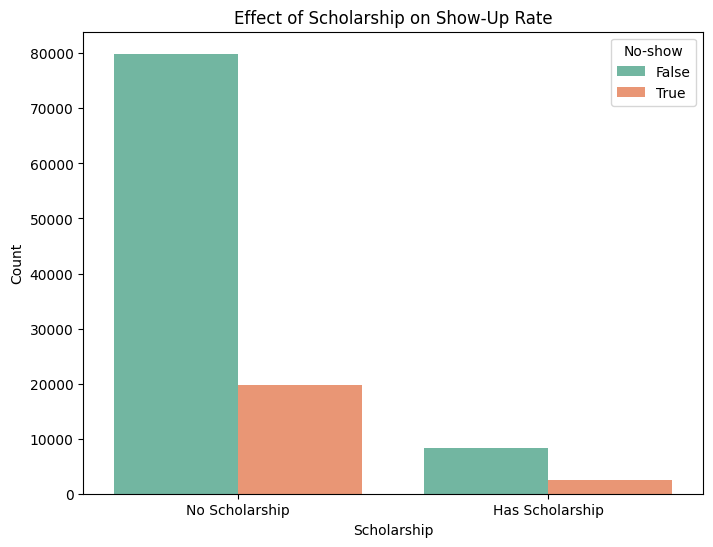

In [17]:
## Q3: Scholarship Effect
plt.figure(figsize=(8, 6))
sns.countplot(x='Scholarship', hue='No-show', data=df, palette='Set2')
plt.title('Effect of Scholarship on Show-Up Rate')
plt.xlabel('Scholarship')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Scholarship', 'Has Scholarship'])
plt.show()


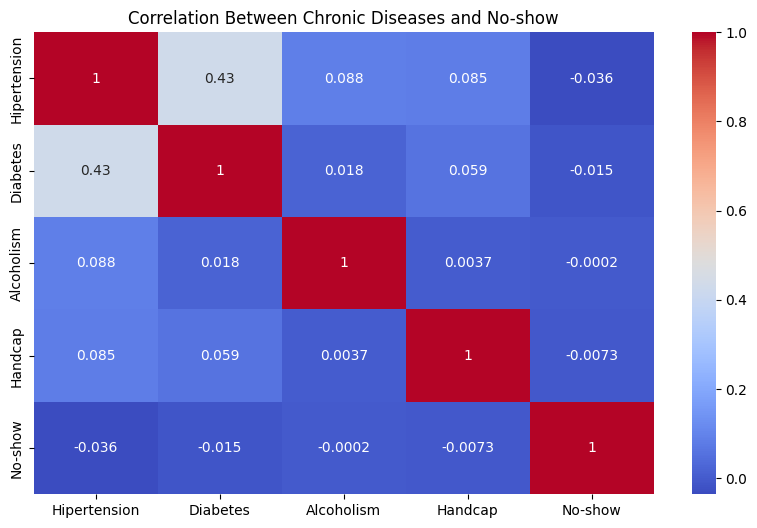

In [18]:
## Q4: Chronic Diseases and Gender
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'No-show']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Chronic Diseases and No-show')
plt.show()

In [19]:
# Conclusion
print("\nConclusions:")
print("1. Women are more likely to show up for appointments than men.")
print("2. SMS reminders seem to have a slight positive effect on attendance.")
print("3. Patients with shorter waiting times are more likely to attend.")
print("4. Having a scholarship or chronic diseases does not strongly affect attendance.")


Conclusions:
1. Women are more likely to show up for appointments than men.
2. SMS reminders seem to have a slight positive effect on attendance.
3. Patients with shorter waiting times are more likely to attend.
4. Having a scholarship or chronic diseases does not strongly affect attendance.


In [20]:
# Save Cleaned Dataset (Optional)
cleaned_file_path = '/content/noshowappointments-kagglev2-may-2016.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: /content/noshowappointments-kagglev2-may-2016.csv
